In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def laguerr(t,n,beta=2,sigma=4):
    lg0=np.sqrt(sigma)*np.exp(-beta*(t/2))
    lg1=np.sqrt(sigma)*(1-sigma*t)*np.exp(-beta*(t/2))
    if n==0:
        return lg0
    if n==1:
        return lg1
    
    for i in range(2, n+1):
        temp = lg1
        lg1 = (2*i -1 -sigma*t)*lg1/i - (i-1)*lg0 / i
        lg0 = temp
     
    return lg1

In [4]:
laguerr(1,3)

1.7167707254667308

In [5]:
#2
def laguerr_tabulation(T,n=2,beta=2,sigma=4):
    t = np.linspace(0, T, 10)
    results = laguerr(t, n, beta, sigma)
    df = pd.DataFrame({'t': t, 'l': results})
    return df.round(5)

In [6]:
laguerr_tabulation(10)

,t,l
0,0.00000,2.00000
1,1.11111,1.30864
2,2.22222,4.92606
3,3.33333,4.51078
4,4.44444,2.89995
5,5.55556,1.57319
6,6.66667,0.77178
7,7.77778,0.35420
8,8.88889,0.15501
9,10.00000,0.06547


In [7]:
#3
def experiment(T, beta, sigma, epsilon=1e-3, N=20):
    t = np.linspace(0, T, 1000)
    n = range(1, N+1)
    result = None
    for i in t:
        f = True
        for j in n:
            if abs(laguerr(i, j, beta, sigma)) > epsilon:
                f = False
                break
        if f and result is None:
            result = i
    

    cols = {"t" : t}
    for j in n:
        cols[f"n={j}"] = laguerr(t, j, beta, sigma)

    df = pd.DataFrame(cols)

    return result, df.round(5)

In [8]:
shortest, df = experiment(100, 2, 4)

In [9]:
shortest

79.07907907907908

In [10]:
df


,t,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,...,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20
0,0.0000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
1,0.1001,1.08497,0.50550,0.05172,-0.29380,-0.54668,-0.72094,-0.82906,-0.88217,-0.89014,...,-0.80442,-0.72510,-0.62955,-0.52282,-0.40925,-0.29253,-0.17579,-0.06163,0.04782,0.15085
2,0.2002,0.32612,-0.45997,-0.86125,-0.98978,-0.93409,-0.76300,-0.52907,-0.27143,-0.01825,...,0.40417,0.55421,0.65857,0.71780,0.73477,0.71390,0.66063,0.58092,0.48093,0.36668
3,0.3003,-0.29802,-1.00863,-1.07852,-0.80705,-0.39600,0.02583,0.38297,0.63795,0.77947,...,0.75506,0.62619,0.44937,0.24662,0.03764,-0.16110,-0.33677,-0.48021,-0.58574,-0.65081
4,0.4004,-0.80621,-1.23375,-0.86012,-0.23551,0.33962,0.72824,0.89472,0.86127,0.67826,...,0.09748,-0.19735,-0.44519,-0.62440,-0.72499,-0.74672,-0.69683,-0.58770,-0.43478,-0.25469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.5996,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
996,99.6997,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
997,99.7998,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
998,99.8999,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000


In [11]:
#4
def integral(f, a, b, N=10000):
    x = np.linspace(a, b, N)
    s = sum([f(i) for i in x])
    return s*abs(b-a)/N


In [18]:
t=2
integral(f,0,1)

0.15853614787658715

In [13]:
#5
def laguerr_transformation(f, n, beta=2, sigma=4):
    def integrand(tu):
        return f(tu)*laguerr(tu, n, beta, sigma)*np.exp(-tu*(sigma-beta))
    b = experiment(100, beta, sigma)[0]
    return integral(integrand, 0, b)

In [14]:
def tabulate_transformation(f, N, beta, sigma):
    t = range(1, N+1)
    results = [laguerr_transformation(f, n, beta, sigma) for n in t]
    
    return results

In [15]:
def f(t):
    if t<=2*np.pi and t>=0:
        return np.sin(t-np.pi/2)+1
    else:
        return 0

In [16]:
laguerr_transformation(f,3)

-0.0742826695000306

In [17]:
tabulate_transformation(f, 20, 2, 4)

[-0.1822039881310192,
 0.17805610913078898,
 -0.0742826695000306,
 0.007262784325811692,
 0.007587430478937864,
 -0.003096494945065475,
 -0.0006148703444646362,
 0.0007994250066752776,
 -2.5850153812011465e-05,
 -0.00023592602139502894,
 5.256960095504625e-05,
 9.381390277832641e-05,
 -3.0676683574269335e-05,
 -5.2658350956100556e-05,
 1.097528013689054e-05,
 3.616172697533956e-05,
 4.5476548832641705e-06,
 -2.3361494137766216e-05,
 -1.4823620942386276e-05,
 8.910978104645316e-06]

In [19]:
#6
def reversed_laguerr_transformation(h_list, t, beta=2, sigma=4):
    result_sum = 0

    h_list_new = list(filter(lambda x: x != 0, h_list))

    for i in range(len(h_list_new)):
        result_sum += h_list_new[i]*laguerr(t, i, beta, sigma)
    
    return result_sum

In [20]:
def f_test(t):
    return t

In [21]:
transfomormed_temp = tabulate_transformation(f_test, 20, 2, 4)
reversed_laguerr_transformation(transfomormed_temp, 1, 2, 4)

-0.7776771623336753

In [22]:
#7
def plot_laguerr(T, N, beta=2, sigma=4):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for n in range(N+1):
        laguerr_values = laguerr_tabulation(T, n, beta, sigma)
        ax.plot(laguerr_values['t'], laguerr_values['l'], label=f"n={n}", linewidth=2.0, alpha=0.7)
    
    ax.set_xlabel("t")
    ax.set_ylabel("l(t)")
    ax.set_title("Laguerr polynomials")
    fig.legend(loc='lower center', ncol=5)
    plt.show()


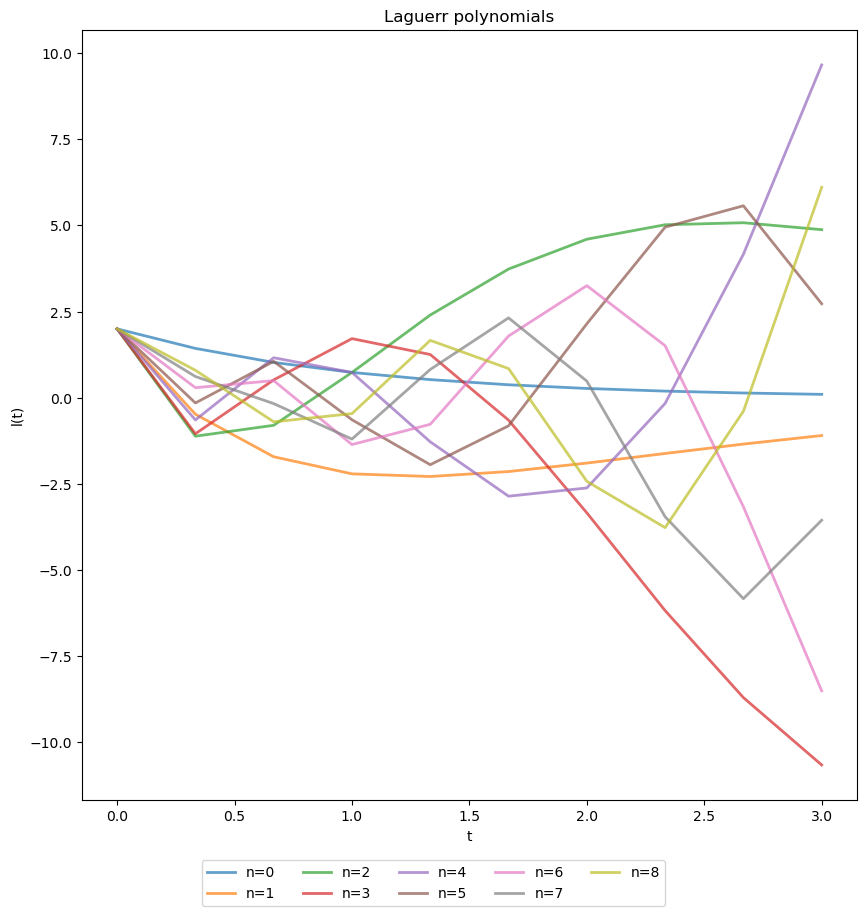

In [23]:
plot_laguerr(3,8)

In [24]:
#8
def plot_tranformations(f, n, beta=2, sigma=4, t1=0, t2=2*np.pi):

    transform_values = tabulate_transformation(f, n, beta, sigma)
    reversed_transform_values = [reversed_laguerr_transformation(transform_values, t, beta, sigma) for t in np.linspace(t1, t2, 1000)]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.subplots(2, 1)
    ax[0].bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')

    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_title("Transformation coefs")
    ax[0].set_xticks(range(1, n+1))
    fig.tight_layout()
    ax[0].axhline(0, color='black')

    ax[1].plot(np.linspace(t1, t2, 1000), reversed_transform_values, alpha=0.7, linewidth=2.0)
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].set_title("Reversed transformation")

    plt.show()

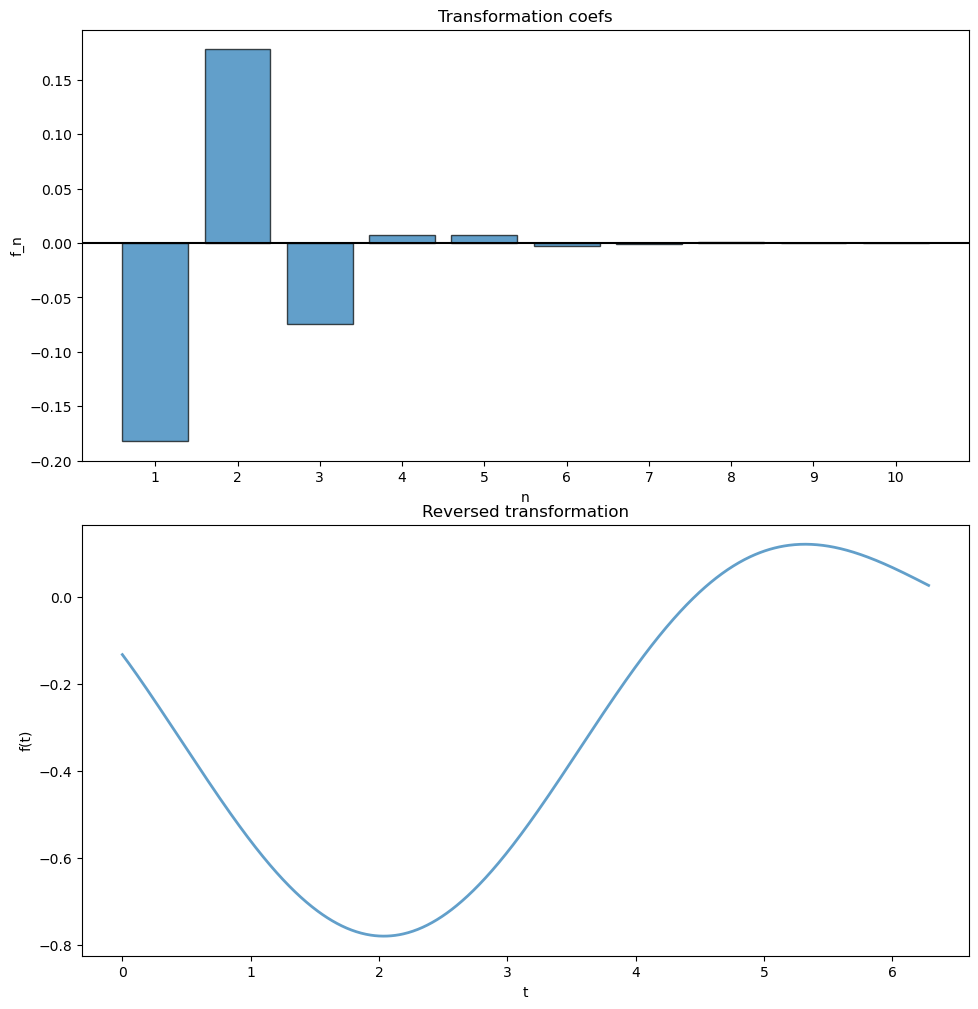

In [25]:
plot_tranformations(f, 10)

In [27]:
#9
def myfunc(t):
    if t<=2*np.pi and t>=0:
        return np.cos(t+(3*np.pi)/2)
    else:
        return 0

In [28]:
laguerr_transformation(myfunc,3)

0.02719005828530653

In [29]:
transfomormed_temp = tabulate_transformation(myfunc, 20, 2, 4)
reversed_laguerr_transformation(transfomormed_temp, 1, 2, 4)

-0.38434344433783213

In [30]:
def plot_transformations(f, n, beta=2, sigma=4, t1=0, t2=6):

    transform_values = tabulate_transformation(myfucn, n, beta, sigma)
    reversed_transform_values = [reversed_laguerre_transformation(transform_values, t, beta, sigma) for t in np.linspace(t1, t2, 1000)]
    
    t_values = np.linspace(t1, t2, 1000)
    original_function_values = [f(t) for t in t_values]

    fig, ax = plt.subplots(3, 1, figsize=(10, 15))

    ax[0].bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')
    ax[0].axhline(0, color='black')
    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_title("Transformation coefficients")
    ax[0].set_xticks(range(1, n+1))

    ax[1].plot(t_values, original_function_values, label='Original Function', alpha=0.7, linewidth=2.0)
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].set_title("Original Function")
    ax[1].legend()

    ax[2].plot(np.linspace(t1, t2, 1000), reversed_transform_values, alpha=0.7, linewidth=2.0)
    ax[2].set_xlabel("t")
    ax[2].set_ylabel("f(t)")
    ax[2].set_title("Reversed transformation")

    plt.show()

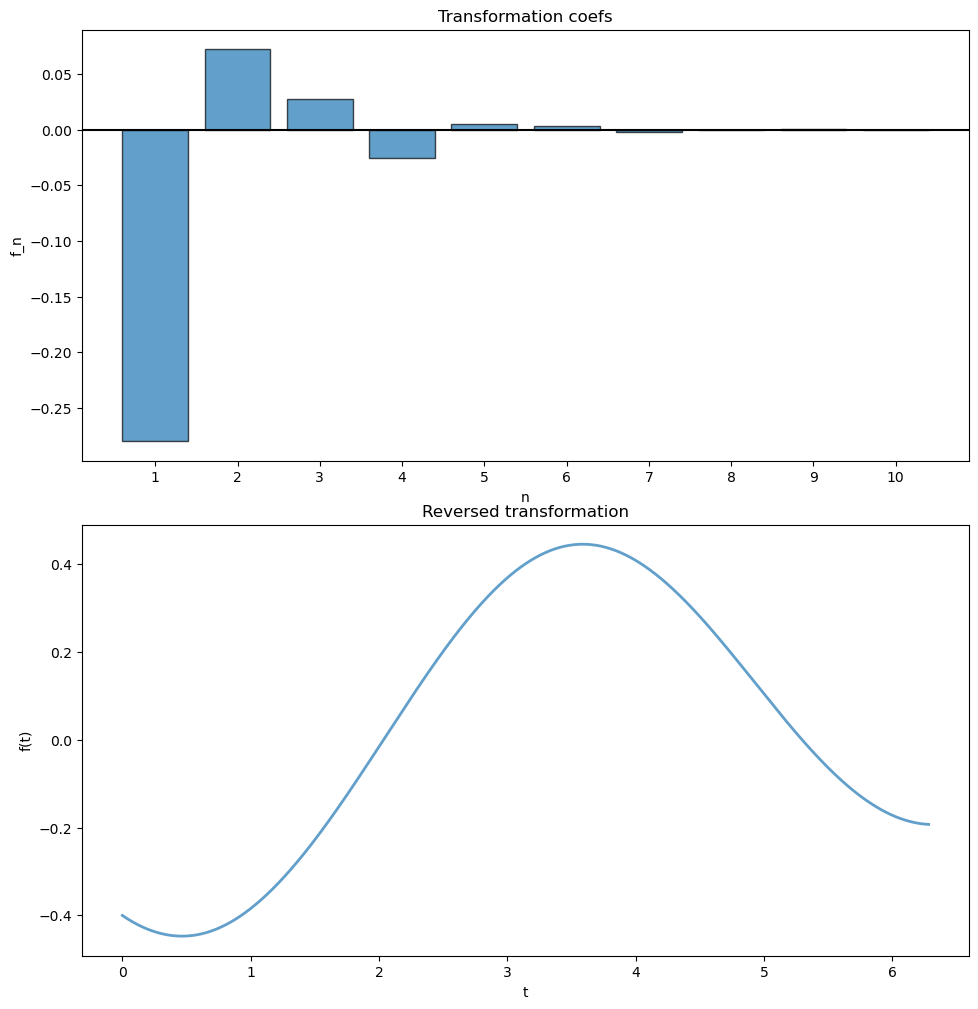

In [64]:
plot_tranformations(myfunc, 10)

In [35]:
from ipywidgets import widgets
def myfunc(t):
    if 0 <= t <= 2 * np.pi:
        return np.cos(t + (3 * np.pi) / 2)
    else:
        return 0

def plot_transformations(f, n, beta=2, sigma=4, t1=0, t2=6):
    transform_values = tabulate_transformation(f, n, beta, sigma)
    reversed_transform_values = [reversed_laguerr_transformation(transform_values, t, beta, sigma) for t in np.linspace(t1, t2, 1000)]

    t_values = np.linspace(t1, t2, 1000)
    original_function_values = [f(t) for t in t_values]

    fig, ax = plt.subplots(3, 1, figsize=(10, 15))

    ax[0].bar(range(1, n+1), transform_values, alpha=0.7, edgecolor='black')
    ax[0].axhline(0, color='black')
    ax[0].set_xlabel("n")
    ax[0].set_ylabel("f_n")
    ax[0].set_title("Transformation coefficients")
    ax[0].set_xticks(range(1, n+1))
    ax[1].plot(t_values, original_function_values, label='Original Function', alpha=0.7, linewidth=2.0)
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("f(t)")
    ax[1].set_title("Original Function")
    ax[1].legend()
    ax[2].plot(np.linspace(t1, t2, 1000), reversed_transform_values, alpha=0.7, linewidth=2.0)
    ax[2].set_xlabel("t")
    ax[2].set_ylabel("f(t)")
    ax[2].set_title("Reversed transformation")

    plt.show()

interact(plot_transformations, f=widgets.fixed(myfunc), n=(1, 10), beta=(1, 5), sigma=(1, 10), t1=(0, 2 * np.pi), t2=(2 * np.pi, 10));


interactive(children=(IntSlider(value=5, description='n', max=10, min=1), IntSlider(value=2, description='beta…